**The Game Sequence**

The player is numbered from 1, 2, ... the global variables *cards_on_board* and *the_cards* are what you get in the box when you buy Sequence. That is the board and cards. Also you will get discs in your player's colour.

This notebook contains the following functions:

  1. **initGame**(): returns the initial *discs_on_board* and deals out cards to the players stored in the list of lists called *hand*.
  2. **isTerminal**(discs_on_board, player): determines if the lookahead of *player* is terminal, if so this *player* wins
  3. **getMoves**(discs_on_board, hand, player) will return a list of tuples ($i,j$) for cards in hand, for normal cards (*legal_moves*) one eyed jacks (*legal_moves_1J*) and two eyed jacks (*legal_moves_2J*)
  4. **drawCard**(deck, hand, card_played) will return a new *hand[player-1]* for *player* and updated the deck by removing the top card. The *card_played* by the *player* is removed from its hand.
  5. **pretty_print**()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# (floki@hi.is)
# test er staða á borðinu og er 10x10 np matrix 
def isTerminal(discs_on_board, player, n):
    tempWin = [[1,1,1,1,1,0,0,0,0,0],
              [0,1,1,1,1,1,0,0,0,0],
              [0,0,1,1,1,1,1,0,0,0],
              [0,0,0,1,1,1,1,1,0,0],
              [0,0,0,0,1,1,1,1,1,0],
              [0,0,0,0,0,1,1,1,1,1]]

    extraWin = [[0,1,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,1,0],
                [1,1,1,1,1,1,1,1,1,1]]
    temp_board = discs_on_board.copy()
    temp_board[temp_board == -1] = player
    test = temp_board == player
    #test[row][col] = 1
    max_col = len(test[0])
    max_row = len(test)
    cols = [[] for _ in range(max_col)]
    rows = [[] for _ in range(max_row)]
    fdiag = [[] for _ in range(max_row + max_col - 1)]
    bdiag = [[] for _ in range(len(fdiag))]
    min_bdiag = -max_row + 1

    for x in range(max_col):
        for y in range(max_row):
            cols[x].append(test[y][x])
            rows[y].append(test[y][x])
            fdiag[x+y].append(test[y][x])
            bdiag[x-y-min_bdiag].append(test[y][x])
    lists = cols + rows + bdiag + fdiag
    
    np_lists = np.array(lists, dtype=object)

    filt = []
    for i in range(0,len(lists)):
        filt_i = len(np_lists[i]) >= 5 and sum(np_lists[i]) >= 5
        filt.append(filt_i)

    new_list = list(np_lists[filt])
    temp = []
    for i in new_list:
        if(len(i) < 10):
            i = i + ([0.0]*(10 - len(i)))
        temp.append(i)
    if(len(temp) == 0):
        return False
    player_sum = 0
    for i in temp:
        temp_sum = 0
        for j in tempWin:
            temp_sum = sum(np.multiply(i, j))
            if temp_sum >= 5:
              if n == 2:
                player_sum = player_sum + temp_sum
                extra_sum0 = sum(np.multiply(extraWin[0], i));
                extra_sum1 = sum(np.multiply(extraWin[1], i));
                extra_sum2 = sum(np.multiply(extraWin[2], i));
                if player_sum >= 10 or extra_sum0 >= 9 or extra_sum1 >= 9 or extra_sum2 >= 10:
                  return True
                break
              else: 
                return True
    return False

In [3]:
# (tpr@hi.is)
# some global variables used by the games, what we get in the box!
the_cards = ['AC','2C','3C','4C','5C','6C','7C','8C','9C','1C','QC','KC',
             'AS','2S','3S','4S','5S','6S','7S','8S','9S','1S','QS','KS',
             'AD','2D','3D','4D','5D','6D','7D','8D','9D','1D','QD','KD',
             'AH','2H','3H','4H','5H','6H','7H','8H','9H','1H','QH','KH',
             '1J','2J']
cards_on_board = np.matrix([[-1, 0,11,10, 9, 8, 7, 6, 5,-1],
                            [24,18,19,20,21,22,23,12, 4,13],
                            [35,17, 9, 8, 7, 6, 5,25, 3,14],
                            [34,16,10,43,42,41, 4,26, 2,15],
                            [33,15,11,44,37,40, 3,27, 1,16],
                            [32,14, 0,45,38,39, 2,28,36,17],
                            [31,13,24,46,47,36, 1,29,47,18],
                            [30,37,35,34,33,32,31,30,46,19],
                            [29,38,39,40,41,42,43,44,45,20],
                            [-1,28,27,26,25,12,23,22,21,-1]])
# initialize the game, n is the number of players
def initGame(n = 2):
  discs_on_board = np.zeros((10,10), dtype = 'int8') # empty!
  discs_on_board[np.ix_([0,0,9,9],[0,9,0,9])] = -1 # the corners are "-1"
  # There are two decks of cards each with 48 unique cards if we remove the Jacks lets label them 0,...,47
  # Let card 48 by one-eyed Jack and card 49 be two-eyed jack there are 4 each of these
  cards = np.hstack((np.arange(48),np.arange(48),48,48,48,48,49,49,49,49))
  deck = cards[np.argsort(np.random.rand(104))] # here we shuffle the cards, note we cannot use shuffle (we have non-unique cards)
  # now lets deal out the hand, each player gets m[n] cards
  m = [None, None, 7, 6, 6]
  hand = []
  for i in range(n):
    hand.append(deck[:m[n]]) # deal player i m[n] cards
    deck = deck[m[n]:] # remove cards from deck
  return deck, hand, discs_on_board
# printing the board is useful for debugging code...
def pretty_print(discs_on_board, hand):
  color = ["","*","*","*","*"]
  for i in range(10):
    for j in range(10):
      if (discs_on_board[i,j] <= 0):
        if cards_on_board[i,j] >= 0:
          print(the_cards[cards_on_board[i,j]], end = " ")
        else:
          print("-1", end = " ")
      else:
        print(color[discs_on_board[i,j]]+str(discs_on_board[i,j]), end = " ")
    print("")
  for i in range(len(hand)):
    print("player ", i+1, "'s hand: ", [the_cards[j] for j in hand[i]], sep = "")
# get all feasible moved for normal cards, one-eyed jacks and two-eyed jacks
def getMoves(discs_on_board, hand, player, debug = False):
  # legal moves for normal playing cards
  iH = np.in1d(cards_on_board, hand[player-1]).reshape(10,10) # check for cards in hand
  iA = (discs_on_board == 0) # there is no disc blocking
  legal_moves = np.argwhere(iH & iA)
  # legal moves for one-eyed Jacks (they remove)
  if 48 in hand[player-1]:
    legal_moves_1J = np.argwhere((discs_on_board != -1) & (discs_on_board != 0) & (discs_on_board != player))
  else:
    legal_moves_1J = np.array([])
  # legal moves for two-eyed Jacks (they are wild)
  if 49 in hand[player-1]:
    legal_moves_2J = np.argwhere(discs_on_board == 0)
  else:
    legal_moves_2J = np.array([])
  if debug:
    print("legal_moves for player ", player)
    for i,j in legal_moves: 
      print(the_cards[cards_on_board[i,j]], end = " ")
    print("")
  return legal_moves, legal_moves_1J, legal_moves_2J

def drawCard(deck, hand, card_played, debug = False):
  # remove card player from hand
  if len(deck) > 0:
    new_card = deck[0] # take top card from the deck
    deck = deck[1:] # remove the card from the deck
    i = np.where(hand == card_played) # find location of card played in hand
    if debug:
      print("Hand before change",hand)
    if len(i) > 0:
      hand[i[0][0]] = new_card # replace the card played with a new one
    else:
      print("drawCard, could not find this cards in the current hand?!")
      raise
    if debug:
      print("Hand after change", hand)
  else:
    i = np.where(hand == card_played) # find location of card played in hand
    if debug:
      print("Hand before change",hand)
    if len(i) > 0:
      hand = np.delete(hand, i[0][0]) # set invalid card
    else:
      print("drawCard, could not find this cards in the current hand?!")
      raise
    if debug:
      print("Hand after change", hand)

  return deck, hand

-1 AC KC QC 1C 9C 8C 7C 6C -1 
AD 7S 8S 9S 1S QS KS AS 5C 2S 
KD 6S 1C 9C 8C 7C 6C 2D 4C 3S 
QD 5S QC 8H 7H 6H 5C 3D 3C 4S 
1D 4S KC 9H 2H 5H 4C 4D 2C 5S 
9D 3S AC 1H 3H 4H 3C 5D AH 6S 
8D 2S AD QH KH AH 2C 6D KH 7S 
7D 2H KD QD 1D 9D 8D 7D QH 8S 
6D 3H 4H 5H 6H 7H 8H 9H 1H 9S 
-1 5D 4D 3D 2D AS KS QS 1S -1 
player 1's hand: ['KS', '9H', '2D', '4C', '2D', '1D', 'AC']
player 2's hand: ['6D', '4H', '2H', 'AH', 'QS', '9D', '4C']
[[-1  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0  0  0 -1]]


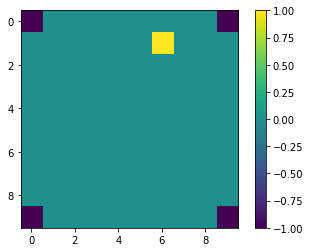

[[-1  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0  0  0 -1]]


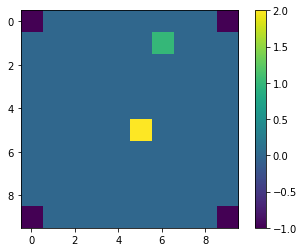

[[-1  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0  0  0 -1]]


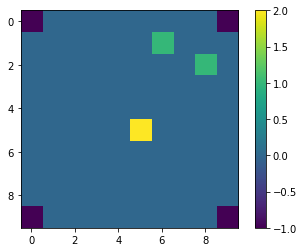

[[-1  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0  0  0 -1]]


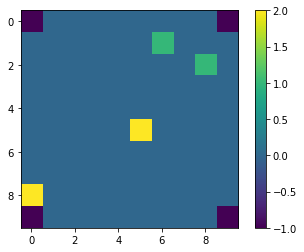

[[-1  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0  0  0 -1]]


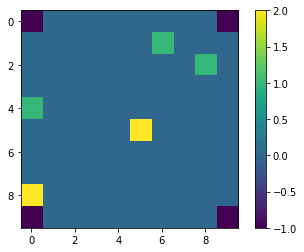

[[-1  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


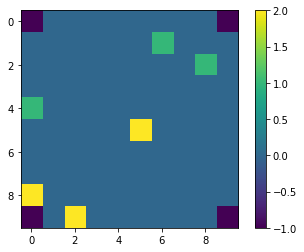

[[-1  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


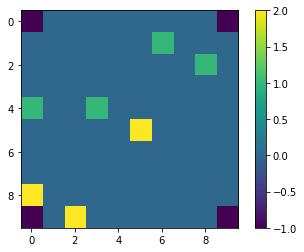

[[-1  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


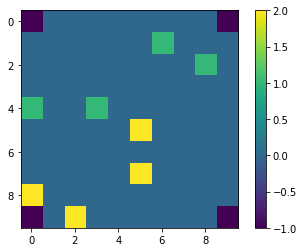

[[-1  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


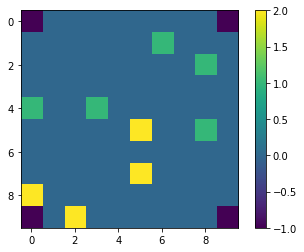

[[-1  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


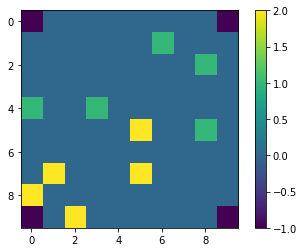

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


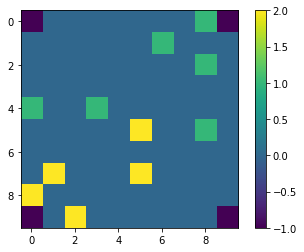

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  1  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


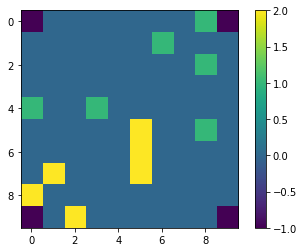

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  1  1]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


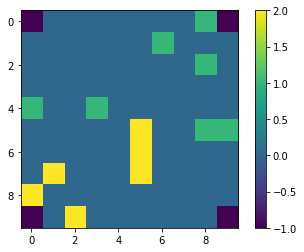

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  1  1]
 [ 0  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


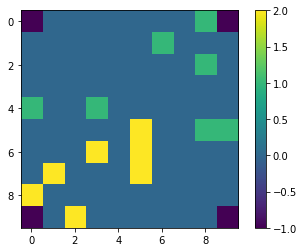

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  2  0  0  1  1]
 [ 0  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


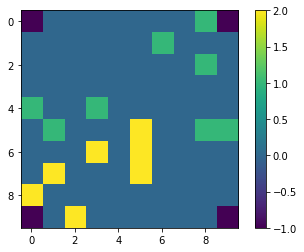

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  2  0  0  1  1]
 [ 0  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


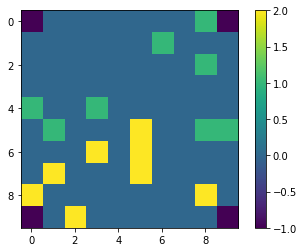

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  1  2  0  0  1  1]
 [ 0  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


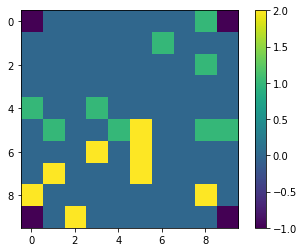

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


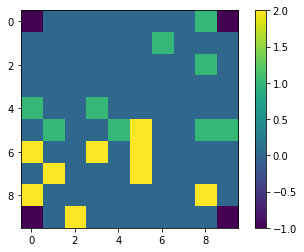

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


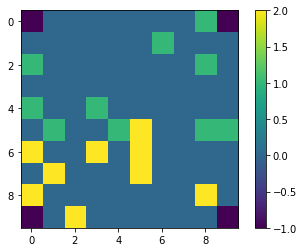

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  2  0  0  0]
 [ 0  1  0  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


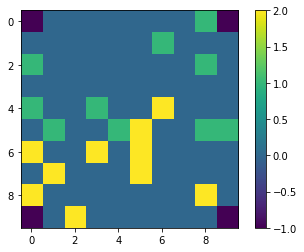

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  1  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  2  0  0  0]
 [ 0  1  0  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


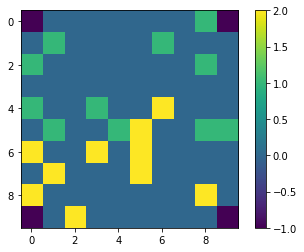

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  1  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  2  0  0  0]
 [ 0  1  0  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


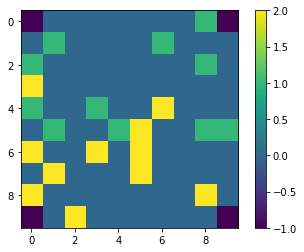

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  1  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


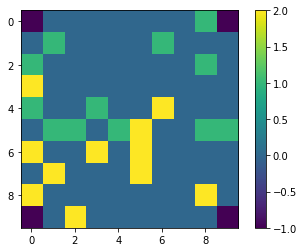

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  1  0  0  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  0]
 [-1  0  2  0  0  0  0  0  0 -1]]


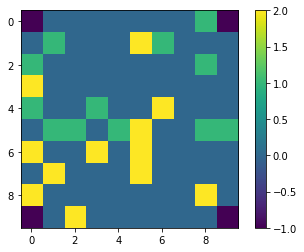

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  1  0  0  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  0]
 [-1  0  2  0  1  0  0  0  0 -1]]


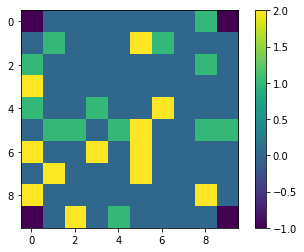

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  1  0  0  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


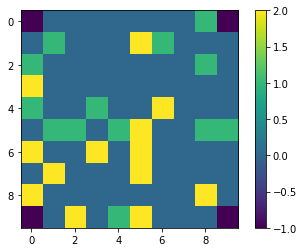

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  1  0  0  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  1  0  0  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


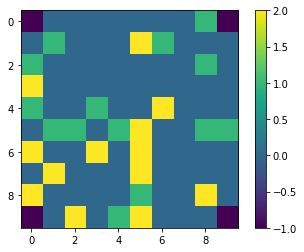

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  1  0  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  1  0  0  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


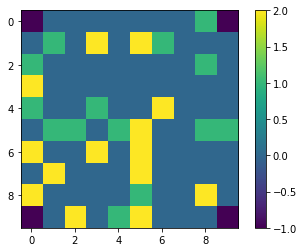

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 0  1  0  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


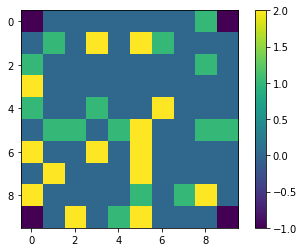

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  0  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


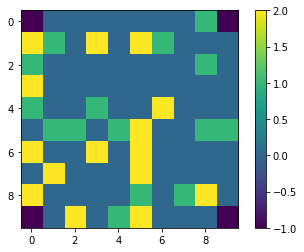

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  0  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


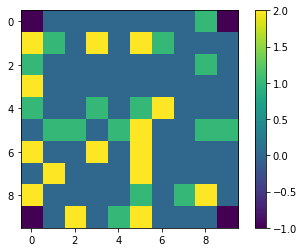

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  0  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 2  2  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


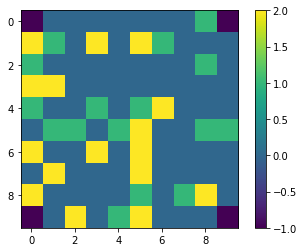

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  0  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  1  1  0]
 [ 2  2  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


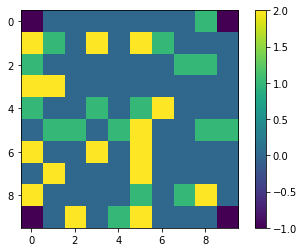

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  0  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  1  1  0]
 [ 2  2  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  2  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


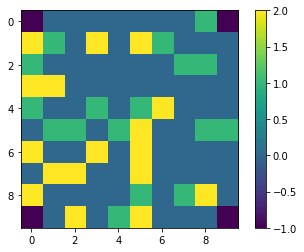

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  0  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  1  1  0]
 [ 2  2  0  0  0  0  0  0  0  1]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  2  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


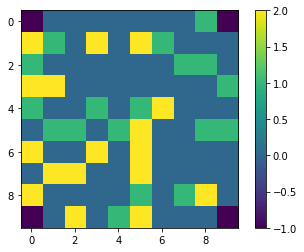

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  0  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  1  1  0]
 [ 2  2  0  0  0  0  0  0  0  1]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  2  0  0  2  0  0  0  2]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


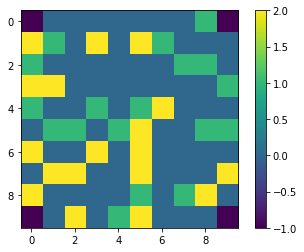

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  0  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  1  1  0]
 [ 2  2  0  0  0  1  0  0  0  1]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  2  0  0  2  0  0  0  2]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


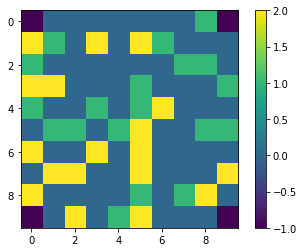

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  0  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  2  0  1  1  0]
 [ 2  2  0  0  0  1  0  0  0  1]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  2  0  0  2  0  0  0  2]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


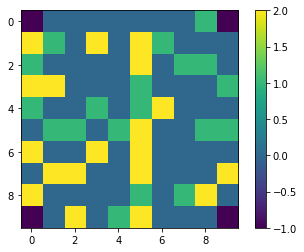

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  1  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  2  0  1  1  0]
 [ 2  2  0  0  0  1  0  0  0  1]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  2  0  0  2  0  0  0  2]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


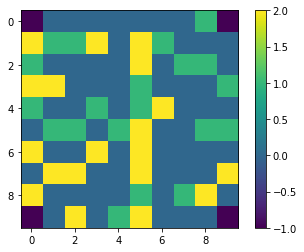

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  1  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  2  0  1  1  0]
 [ 2  2  0  0  0  1  2  0  0  1]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 0  2  2  0  0  2  0  0  0  2]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


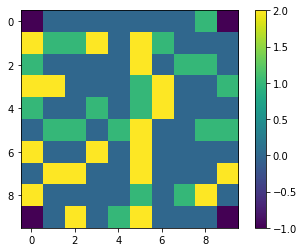

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  1  2  0  2  1  0  0  0]
 [ 1  0  0  0  0  2  0  1  1  0]
 [ 2  2  0  0  0  1  2  0  0  1]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 1  2  2  0  0  2  0  0  0  2]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


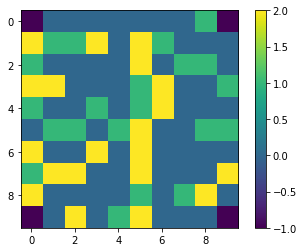

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  1  2  0  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  0  0  1  2  0  0  1]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  0  0]
 [ 1  2  2  0  0  2  0  0  0  2]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


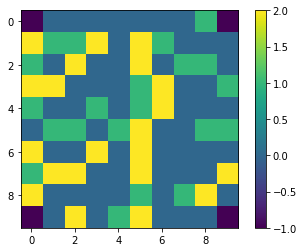

[[-1  0  0  0  0  0  0  0  1 -1]
 [ 2  1  1  2  0  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  0  0  1  2  0  0  1]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  0  0  0  2]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


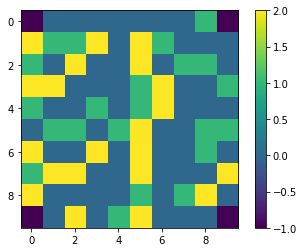

[[-1  0  0  0  0  2  0  0  1 -1]
 [ 2  1  1  2  0  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  0  0  1  2  0  0  1]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  0  0  0  2]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


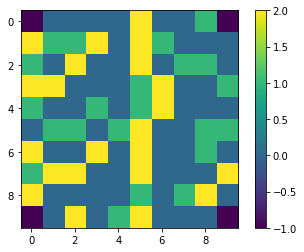

[[-1  0  0  0  0  2  0  0  1 -1]
 [ 2  1  1  2  0  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  0  0  1  2  0  0  1]
 [ 1  0  0  1  0  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


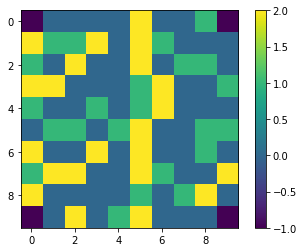

[[-1  0  0  0  0  2  0  0  1 -1]
 [ 2  1  1  2  0  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  0  0  1  2  0  0  1]
 [ 1  0  0  1  2  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  0  0  0  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


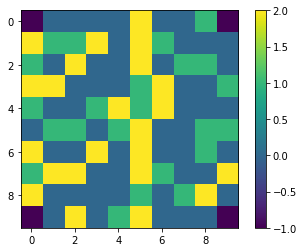

[[-1  0  0  0  0  2  0  0  1 -1]
 [ 2  1  1  2  0  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  0  0  1  2  0  0  1]
 [ 1  0  0  1  2  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  0  0  1  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


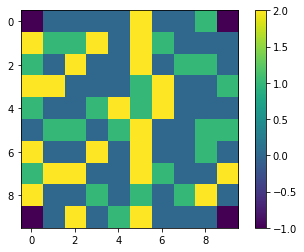

[[-1  0  0  0  0  2  0  0  1 -1]
 [ 2  1  1  2  0  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  0  0  1]
 [ 1  0  0  1  2  1  2  0  0  0]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  0  0  1  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


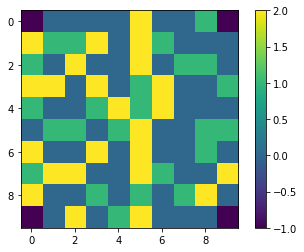

[[-1  0  0  0  0  2  0  0  1 -1]
 [ 2  1  1  2  0  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  0  0  1]
 [ 1  0  0  1  2  1  2  0  0  1]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  0  0  1  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


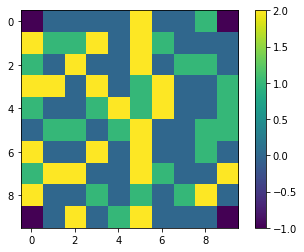

[[-1  0  0  0  0  2  2  0  1 -1]
 [ 2  1  1  2  0  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  0  0  1]
 [ 1  0  0  1  2  1  2  0  0  1]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  0  0  1  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


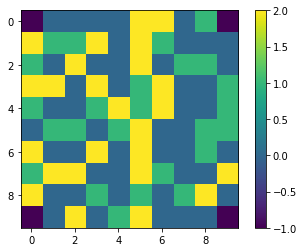

[[-1  0  1  0  0  2  2  0  1 -1]
 [ 2  1  1  2  0  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  0  0  1]
 [ 1  0  0  1  2  1  2  0  0  1]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  0  0  1  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


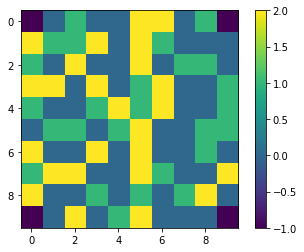

[[-1  0  1  0  0  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  0  0  1]
 [ 1  0  0  1  2  1  2  0  0  1]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  0  0  1  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


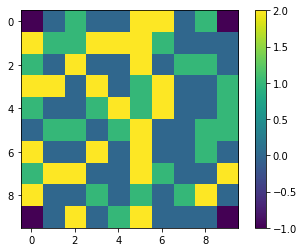

[[-1  0  1  0  0  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  0  0  1]
 [ 1  0  1  1  2  1  2  0  0  1]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  0  0  1  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


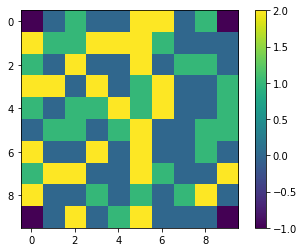

[[-1  0  1  0  0  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  0  0  1]
 [ 1  2  1  1  2  1  2  0  0  1]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  0  0  1  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


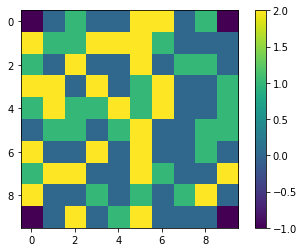

[[-1  0  1  0  0  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  0  0  1]
 [ 1  2  1  1  2  1  2  0  0  1]
 [ 0  1  1  0  1  2  0  0  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  1  0  1  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


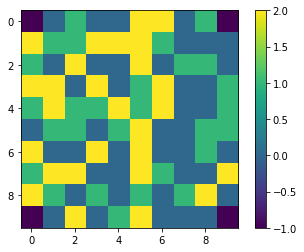

[[-1  0  1  0  0  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  0  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  0  0  1]
 [ 1  2  1  1  2  1  2  0  0  1]
 [ 0  1  1  0  1  2  0  2  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  1  0  1  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


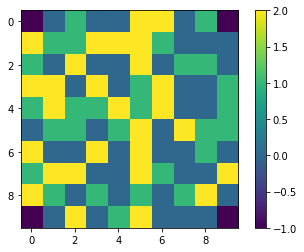

[[-1  0  1  0  0  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  1  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  0  0  1]
 [ 1  2  1  1  2  1  2  0  0  1]
 [ 0  1  1  0  1  2  0  2  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  1  0  1  0  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


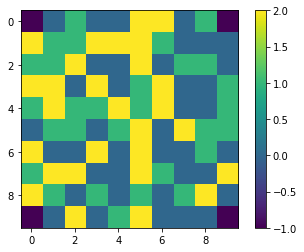

[[-1  0  1  0  0  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  1  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  0  0  1]
 [ 1  2  1  1  2  1  2  0  0  1]
 [ 0  1  1  0  1  2  0  2  1  1]
 [ 2  0  0  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


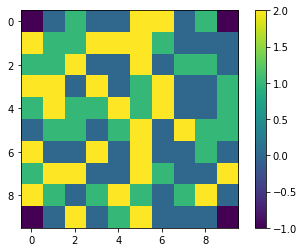

[[-1  0  1  0  0  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  1  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  0  0  1]
 [ 1  2  1  1  2  1  2  0  0  1]
 [ 0  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


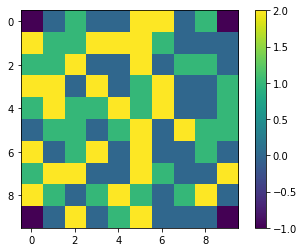

[[-1  0  1  0  0  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  1  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  0  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 0  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


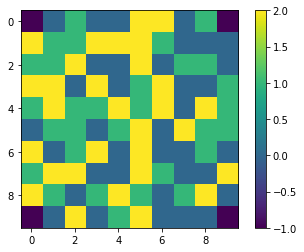

[[-1  0  1  0  0  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  1  2  0  0  2  0  1  1  0]
 [ 2  2  0  2  0  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 0  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


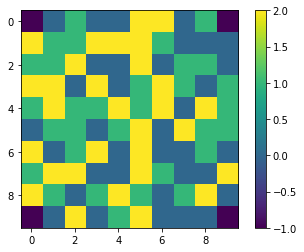

[[-1  0  1  0  0  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  0  2  0  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 0  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  0  2  0  1  2  0  0  0 -1]]


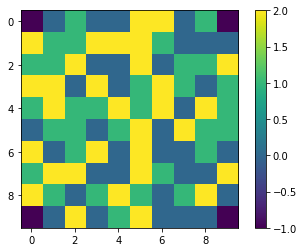

[[-1  0  1  0  0  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  0  2  0  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 0  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  0  0  0 -1]]


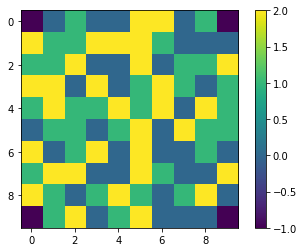

[[-1  0  1  0  2  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  0  2  0  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 0  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  0  0  0 -1]]


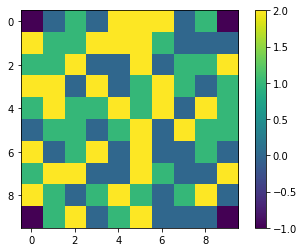

[[-1  0  1  0  2  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  0]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  0  2  0  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  0  0  0 -1]]


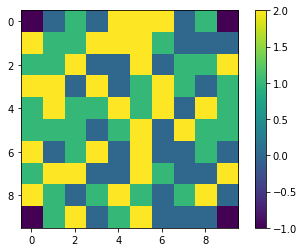

[[-1  0  1  0  2  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  2]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  0  2  0  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  0]
 [ 1  2  2  0  0  2  1  0  0  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  0  0  0 -1]]


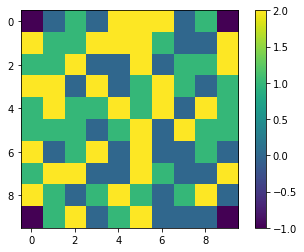

[[-1  0  1  0  2  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  2]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  0  2  0  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  0]
 [ 1  2  2  1  0  2  1  0  0  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  0  0  0 -1]]


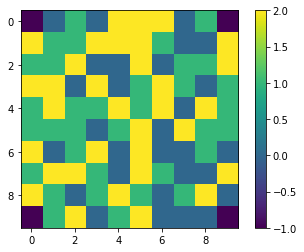

[[-1  0  1  0  2  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  2]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  0  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  0]
 [ 1  2  2  1  0  2  1  0  0  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  0  0  0 -1]]


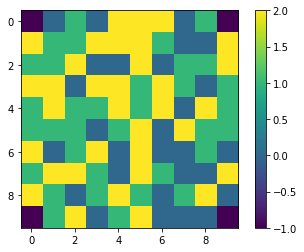

[[-1  0  1  0  2  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  2]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  1  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  0]
 [ 1  2  2  1  0  2  1  0  0  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  0  0  0 -1]]


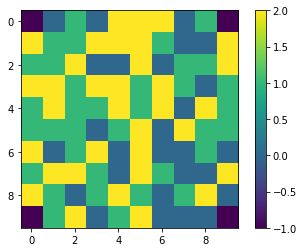

[[-1  0  1  0  2  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  2]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  1  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  2]
 [ 1  2  2  1  0  2  1  0  0  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  0  0  0 -1]]


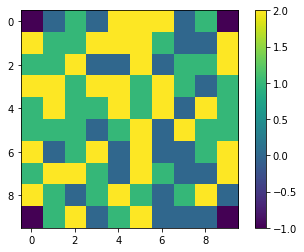

[[-1  0  1  0  2  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  2]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  1  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  2]
 [ 1  2  2  1  0  2  1  0  1  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  0  0  0 -1]]


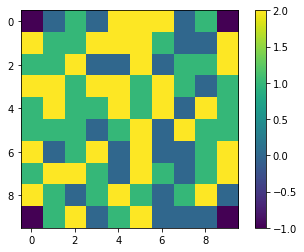

[[-1  0  1  2  2  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  2]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  1  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  2]
 [ 1  2  2  1  0  2  1  0  1  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  0  0  0 -1]]


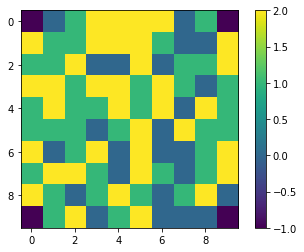

[[-1  0  1  2  2  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  2]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  1  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  2]
 [ 1  2  2  1  0  2  1  0  1  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  1  0  0 -1]]


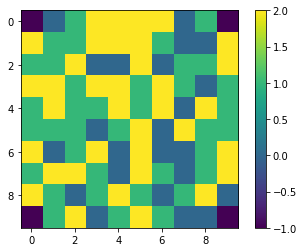

[[-1  0  1  2  2  2  2  0  1 -1]
 [ 2  1  1  2  2  2  1  0  0  2]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  1  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  2]
 [ 1  2  2  1  0  2  1  2  1  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  1  0  0 -1]]


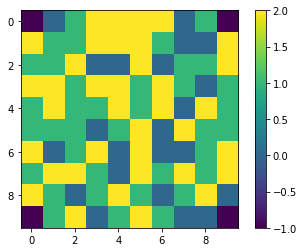

[[-1  0  1  2  2  2  2  1  1 -1]
 [ 2  1  1  2  2  2  1  0  0  2]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  1  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  2]
 [ 1  2  2  1  0  2  1  2  1  2]
 [ 2  1  0  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  1  0  0 -1]]


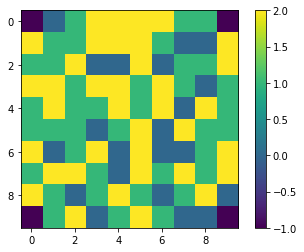

[[-1  0  1  2  2  2  2  1  1 -1]
 [ 2  1  1  2  2  2  1  0  0  2]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  1  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  0  1  2]
 [ 1  2  2  1  0  2  1  2  1  2]
 [ 2  1  2  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  1  0  0 -1]]


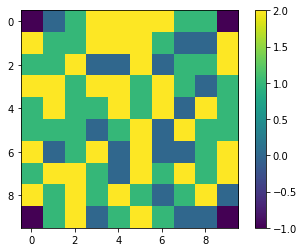

[[-1  0  1  2  2  2  2  1  1 -1]
 [ 2  1  1  2  2  2  1  0  0  2]
 [ 1  1  2  0  0  2  0  1  1  2]
 [ 2  2  1  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  1  1  2]
 [ 1  2  2  1  0  2  1  2  1  2]
 [ 2  1  2  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  1  0  0 -1]]


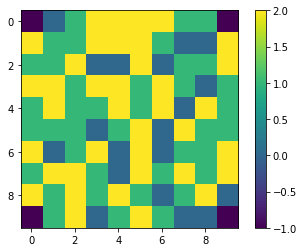

[[-1  0  1  2  2  2  2  1  1 -1]
 [ 2  1  1  2  2  2  1  0  0  2]
 [ 1  1  2  0  0  2  2  1  1  2]
 [ 2  2  1  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  1  1  2]
 [ 1  2  2  1  0  2  1  2  1  2]
 [ 2  1  2  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  1  0  0 -1]]


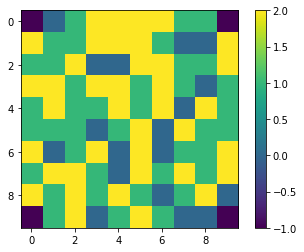

[[-1  0  1  2  2  2  2  1  1 -1]
 [ 2  1  1  2  2  2  1  1  0  2]
 [ 1  1  2  0  0  2  2  1  1  2]
 [ 2  2  1  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  1  1  2]
 [ 1  2  2  1  0  2  1  2  1  2]
 [ 2  1  2  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  1  0  0 -1]]


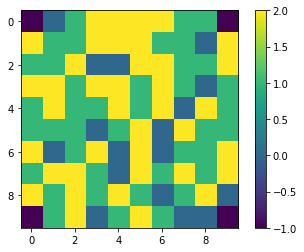

[[-1  0  1  2  2  2  2  1  1 -1]
 [ 2  1  1  2  2  2  1  1  0  2]
 [ 1  1  2  0  0  2  2  1  1  2]
 [ 2  2  1  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  0  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  1  1  2]
 [ 1  2  2  1  0  2  1  2  1  2]
 [ 2  1  2  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  1  2  0 -1]]


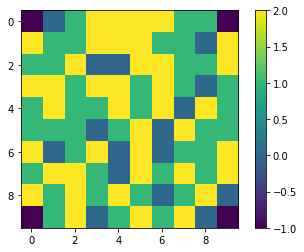

[[-1  0  1  2  2  2  2  1  1 -1]
 [ 2  1  1  2  2  2  1  1  0  2]
 [ 1  1  2  0  0  2  2  1  1  2]
 [ 2  2  1  2  2  1  2  1  0  1]
 [ 1  2  1  1  2  1  2  0  2  1]
 [ 1  1  1  1  1  2  0  2  1  1]
 [ 2  0  1  2  0  2  0  1  1  2]
 [ 1  2  2  1  0  2  1  2  1  2]
 [ 2  1  2  1  2  1  0  1  2  0]
 [-1  1  2  0  1  2  1  2  0 -1]]


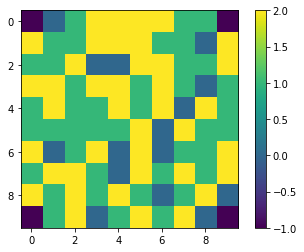

no_feasible_move =  0  player =  1  cards in deck =  9  last played card at coords: ( 5 3 )


In [5]:
# random game player to the end!
n = 2 # number of players, they are numbered 1,2,3,4,...
deck, hand, discs_on_board = initGame(n) # initial hand and empty discs on board!
pretty_print(discs_on_board, hand) # lets print the board and see their hand!
# lets get three types of legal moves, by normal playing cards, one-eyed Jacks (1J) and two-eyed Jacks (2J):
player = 1 # test player "1"
# This simple test run assumes that the player will always try to play a normal card first and then use the Jacks.
no_feasible_move = 0 # counts how many player in a row say pass!
while True:
  legal_moves, legal_moves_1J, legal_moves_2J = getMoves(discs_on_board, hand, player)
  if len(legal_moves) > 0:
    # this is how we would perform a random move using the normal cards:
    k = np.random.choice(range(len(legal_moves)),1)
    (i,j) = tuple(legal_moves[np.random.choice(range(len(legal_moves)),1)][0])
    # print("card played is %d or %s" % (cards_on_board[i,j], the_cards[cards_on_board[i,j]]))
    disc = player
    played_card = cards_on_board[i,j]
  elif len(legal_moves_1J) > 0:
    k = np.random.choice(range(len(legal_moves_1J)),1)
    disc = 0 # remove disc!
    played_card = 48
  elif len(legal_moves_2J) > 0:
    k = np.random.choice(range(len(legal_moves_2J)),1)
    disc = player
    played_card = 49
  else:
    print("Don't have a legal move for player (can this really happen?): ", player)
    disc = -1
    no_feasible_move += 1
  if disc >= 0:
    no_feasible_move = 0
    # now lets place or remove a disc on the board
    discs_on_board[i,j] = disc
    # now we need to draw a new card
    deck, hand[player-1] = drawCard(deck, hand[player-1], played_card)
    # lets pretty print this new state og the game
    #pretty_print(discs_on_board, hand)
    print(discs_on_board)
    plt.imshow(discs_on_board)
    plt.colorbar()
    plt.show()
  if (no_feasible_move == n) | (len(deck) == 0) | (True == isTerminal(discs_on_board, player, n)):
    # Bætti við að það prentar út hnitin á síðasta spili sem var spilað. Léttara að finna hvar leikmaðurinn vann.
    print("no_feasible_move = ", no_feasible_move, " player = ", player, " cards in deck = ", len(deck)," last played card at coords: (",i,j,")")
    break
  player = player%n+1 # next player in line
